# Finance Data Project 

Exploratory data analysis of stock prices.
- Practice data visualization and pandas skills

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

Use pandas to directly read data from Google finance using pandas.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### Use .pickle file if the API doesn't work

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# Wells Fargo
WPC = data.DataReader("WPC", 'yahoo', start, end)

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WPC']

Use pd.concat to concatenate the bank dataframes together to a single data frame called **bank_stocks**
 - Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WPC], axis=1, keys=tickers)

In [6]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.523922   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.146645   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.191933   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.139107   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.161732   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WPC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.006454  25.750000  25.290001  25.299999   
2006-01-04  58.349998  7977800.0  38.032536  26.200001  25.500000  25.500000   
2006-01-05  58.509998  5778000.0  38.136818  27.360001  25.799999  25.799999   
2006-01-06  58.570000  6889800.0  38.175922  27.100000  26.190001  27.100000   
2006-01-09  59.189999  4144500.0  38.580029  27.049999  26.750000  26.750000   

                                           
                Close   Volume  Adj Close  
Date                                       
2006-01-03  25.740000  51200.0  10.937811  
2006-01-04  26.139999  44700.0  11.107781  
2006-01-05  27.200001  92700.0  11.558218  
2006-01-06  26.620001  24800.0  11.311757  
2006-01-09  27.000000  44500.0  11.473228  

[5 rows x 36 columns]

**Set the column name levels**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.523922  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.146645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.191933  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.139107  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.161732  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WPC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.006454  25.750000  25.290001   
2006-01-04   58.700001  58.349998  7977800.0  38.032536  26.200001  25.500000   
2006-01-05   58.549999  58.509998  5778000.0  38.136818  27.360001  25.799999   
2006-01-06   58.770000  58.570000  6889800.0  38.175922  27.100000  26.190001   
2006-01-09   58.630001  59.189999  4144500.0  38.580029  27.049999  26.750000   

Bank Ticker                                            
Stock Info        Open      Close   Volume  Adj Close  
Date                                                   
2006-01-03   25.299999  25.740000  51200.0  10.937811  
2006-01-04   25.500000  26.139999  44700.0  11.107781  
2006-01-05   25.799999  27.200001  92700.0  11.558218  
2006-01-06   27.100000  26.620001  24800.0  11.311757  
2006-01-09   26.750000  27.000000  44500.0  11.473228  

[5 rows x 36 columns]

# Exploratory Data Analysis (EDA)

- Explore the data
- Documentation on multi-level indexing [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

**What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WPC     78.580002
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
'''Thabove equation divides the precious days value, with the current value, 
then subtracts 1. This gives is the percentage return'''

returns = pd.DataFrame()

- The pandas **pct_change()** method allows us the execute this formula
- Use **pct_change()** method on the Close column 
    - To create a column representing the return
    - Create a for loop that creates a *returns column* for each Bank Stock Ticker
        - As well as setting it as a column in the returns DataFrame.

In [11]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WPC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.015540
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,0.040551
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,-0.021324
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.014275


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

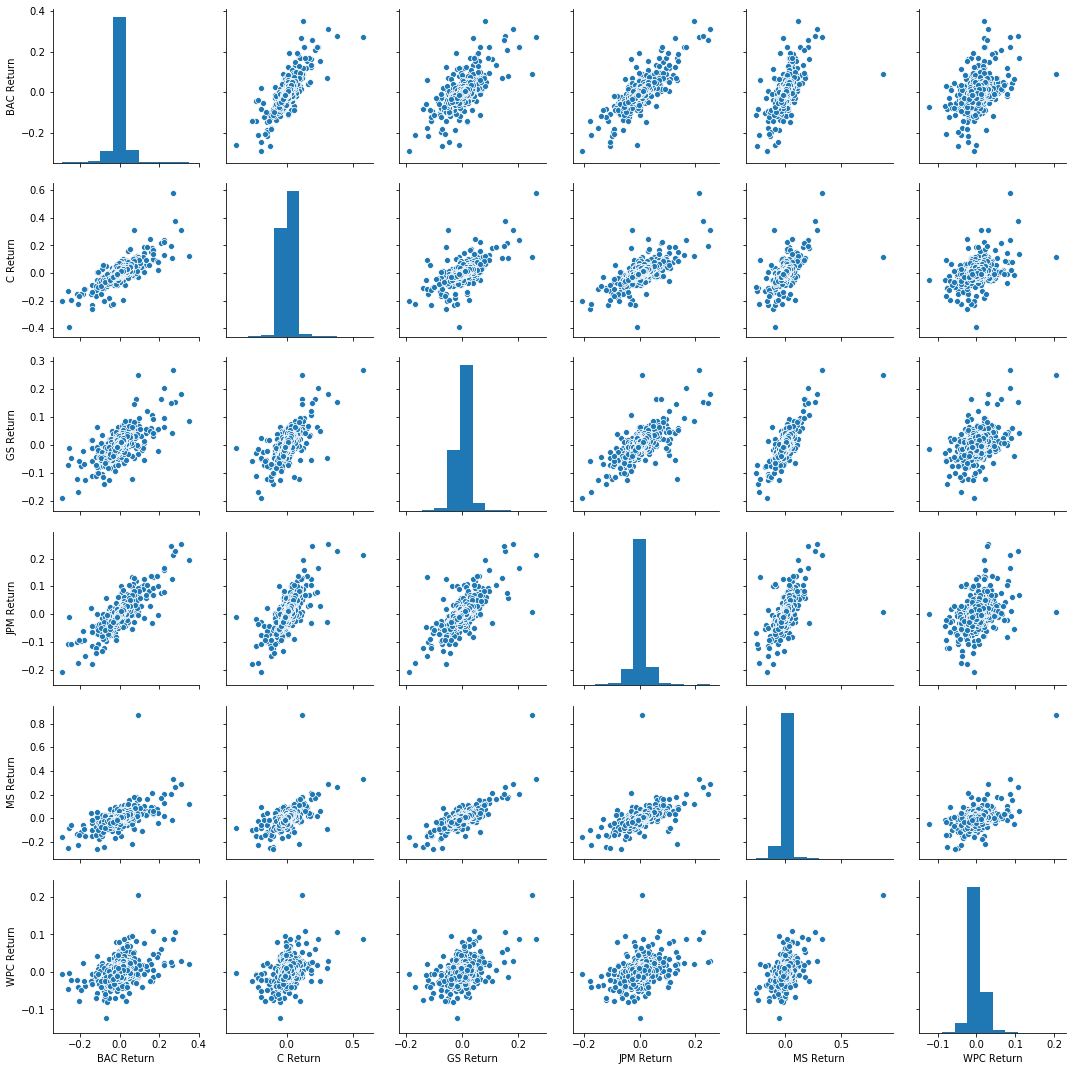

In [13]:
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WPC Return   2008-10-08
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WPC Return   2008-10-13
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WPC Return    0.017168
dtype: float64

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WPC Return    0.011215
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

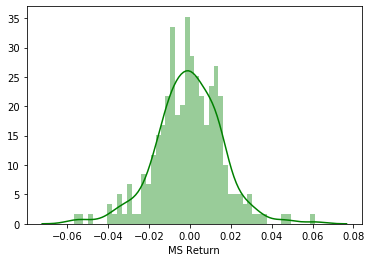

In [18]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='g', bins=50)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

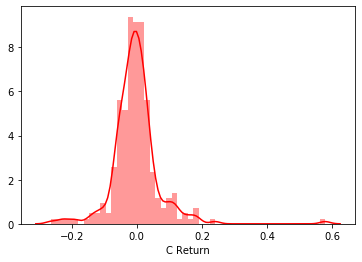

In [19]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='r', bins=50)

# More Visualization
### Imports

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

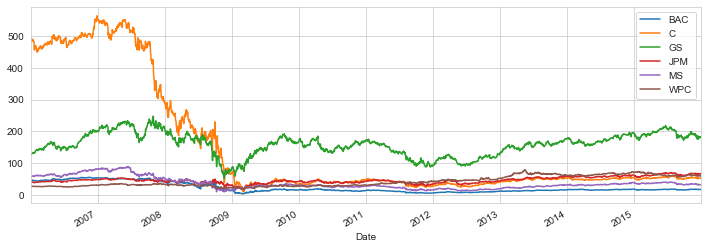

In [21]:
# Loop method
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

In [22]:
# Crosssection method xs. Takes a crossection throughout the whole df based on a key
bank_stocks.xs(key='Close', axis=1, level='Stock Info').head(9)

Bank Ticker,BAC,C,GS,JPM,MS,WPC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,25.740000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,26.139999
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,27.200001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,26.620001
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,27.000000
2006-01-10,46.209999,485.399994,132.029999,40.730000,59.220001,27.250000
2006-01-11,46.099998,489.799988,131.970001,40.700001,59.570000,27.150000
2006-01-12,45.799999,490.299988,132.250000,39.950001,59.470001,26.900000
2006-01-13,45.799999,489.200012,133.259995,39.919998,59.380001,26.840000


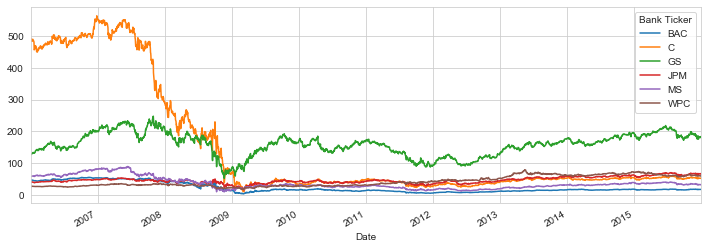

In [23]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(label=tick, figsize=(12,4))

In [24]:
# Create an interactive plot, by using iplot
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

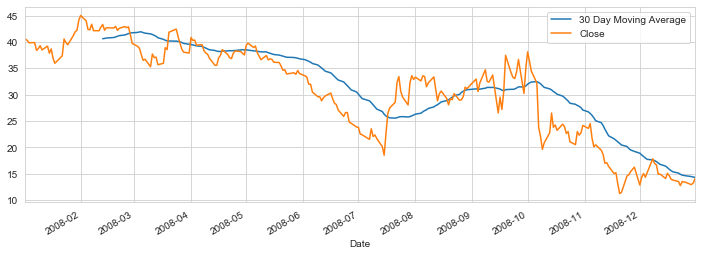

In [25]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Average', figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot()
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

In [26]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WPC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,25.740000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,26.139999
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,27.200001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,26.620001
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,27.000000


In [27]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WPC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,-0.380884
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.411753
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.194705
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.739949
MS,0.944218,0.933609,0.683792,0.250427,1.000000,-0.259015
WPC,-0.380884,-0.411753,0.194705,0.739949,-0.259015,1.000000


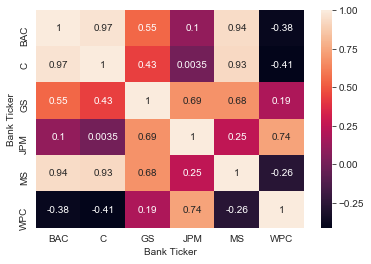

In [28]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

**Optional: Use seaborn's clustermap to cluster the correlations together:**

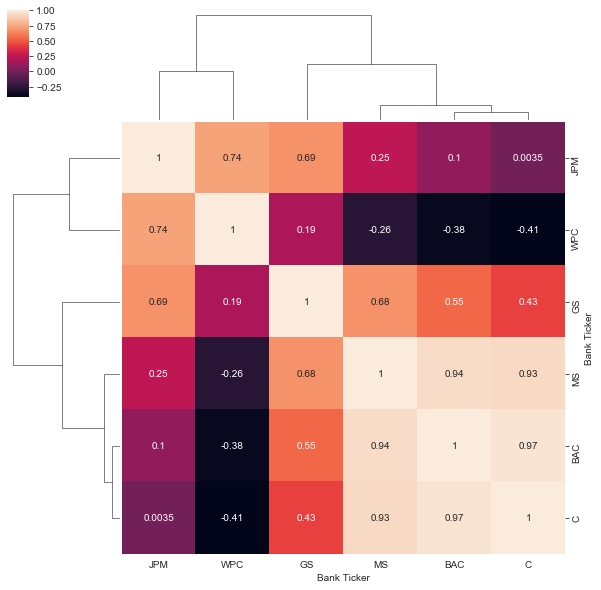

In [29]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

# Part 2 (Optional)

Use the cufflinks library to create some Technical Analysis plots

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [41]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [53]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [51]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')